In [34]:
%matplotlib inline 

In [1]:
import numpy as np
import pandas as pd

In [19]:
import os

In [2]:
asset_base = "../asset/ml-latest-small/"

In [14]:
os.listdir(asset_base)

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [17]:
movies = pd.read_csv(asset_base + "movies.csv")

In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv(asset_base + "ratings.csv")

In [15]:
links = pd.read_csv(asset_base + "links.csv")

In [21]:
df = ratings[ratings.columns[:-1]]

In [23]:
df_table = df.set_index(["userId", "movieId"]).unstack()

In [28]:
df_table.shape

(610, 9724)

In [32]:
len(df["userId"].unique()), len(df["movieId"].unique())

(610, 9724)

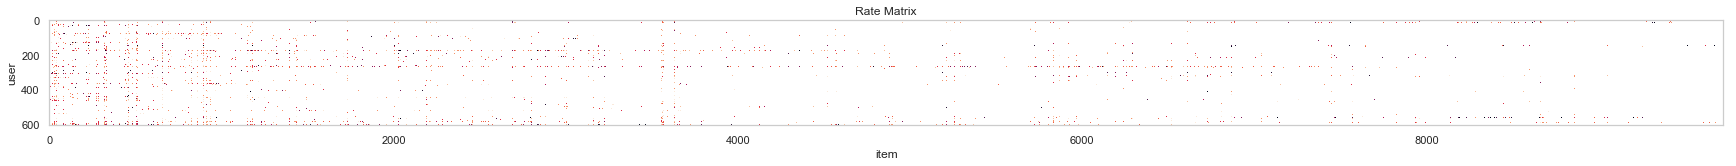

In [39]:
plt.figure(figsize=(30, 55))
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [6]:
from surprise import Reader, Dataset

In [7]:
ratings_dict = {
    'itemID' : list(ratings.movieId),
    'userID' : list(ratings.userId),
    'rating' : list(ratings.rating)
}
df = pd.DataFrame(ratings_dict)

In [10]:
reader = Reader(rating_scale=(0.5, 5.0))

In [11]:
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [13]:
data.split(n_folds=5)

In [14]:
from surprise import SVD, evaluate
from surprise import NMF

In [15]:
#svd
algo = SVD()
evaluate(algo, data, measures=['RMSE'])

#nmf
algo = NMF()
evaluate(algo, data, measures=['RMSE'])

Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8738
------------
Fold 2
RMSE: 0.8807
------------
Fold 3
RMSE: 0.8786
------------
Fold 4
RMSE: 0.8689
------------
Fold 5
RMSE: 0.8641
------------
------------
Mean RMSE: 0.8732
------------
------------
Evaluating RMSE of algorithm NMF.

------------
Fold 1
RMSE: 0.9260
------------
Fold 2
RMSE: 0.9264
------------
Fold 3
RMSE: 0.9285
------------
Fold 4
RMSE: 0.9153
------------
Fold 5
RMSE: 0.9191
------------
------------
Mean RMSE: 0.9231
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.9260175174947258,
                             0.9264494192184367,
                             0.9285429153911526,
                             0.915331503521559,
                             0.9191220948593907]})